# Text emotion detection 

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/tweet_emotions.csv.gz', compression='gzip')

data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


The dataset consists of 3 columns, the `tweet_id`, the `sentiment` (the emotion), and the textual `content`.

In [19]:
print(f'Instances: {len(data["content"])}')
print(f'Unique instances: {len(set(data["content"]))}')
print(f'Unique tweets: {len(set(data["tweet_id"]))}')

Instances: 40000
Unique instances: 39827
Unique tweets: 40000


We have 40k instances to work with, however out of those there are 173 tweets with repeating content. Let's examine some of those instances to see whether they are in different classes

In [47]:
# the amount of rows with the exact same sentiment-content combination
print(sum(data.duplicated(subset=["sentiment", "content"])))

print(data[data["content"] == "Somebody please save the polar bears!"])
print()
print(data[data["content"] == "I'm at work"])

91
       tweet_id sentiment                                content
454  1957075229     worry  Somebody please save the polar bears!
521  1957088574     worry  Somebody please save the polar bears!

        tweet_id sentiment      content
147   1957001506    relief  I'm at work
1026  1957198430   neutral  I'm at work


We therefore have 91 rows which are completely redundant and can be removed from our considerations. On the other hand, we have some contents which were assigned two different classes, in the example of _"I'm at work"_ it is once said to be neutral and once said to be relief (debatable). These instances can be left in as this represents the reality where a single text cannot always be strictly assigned to a single emotion. Also, these instances will act as a low scale reguralizer.

In [59]:
# idempotent removal of duplicates
data = data[~data.duplicated(subset=["sentiment", "content"])]

We will now proceed to examining the class distribution.

<AxesSubplot:xlabel='sentiment', ylabel='instances'>

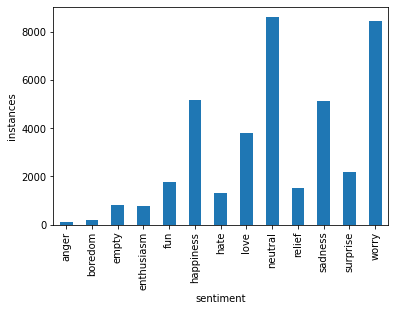

In [80]:
data.groupby("sentiment").nunique()[["tweet_id"]].plot(kind='bar', ylabel='instances', legend=False)

As we can see, the dataset is not very balanced which might greatly hinder the performance of our classifier. There are a few ways to go about it:

- Removal of classes with a low amount of instances; such as _anger_ or _boredom_
- Augmenting some promising classes with statistical models